# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [104]:
import os
import glob
import pandas as pd
#os.chdir("/mydir") #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [105]:
extension = 'csv'
files = glob.glob("*.csv")

In [106]:
print(files)

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']


#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [107]:
#[Write your Code Here]
#Export to csv
#[Write your Code Here]
contents = []
for file in files:
    df = pd.read_csv(file)
    contents.append(df)
    
file = pd.concat([contents[0], contents[1], contents[2]], axis=0)


file.to_csv('new file.csv', index=False)



#### To-Do -Read the CSV file using `pd.read_csv` method

In [108]:
#[Write your Code Here]
df = pd.read_csv('new file.csv')
df.shape

(1000, 17)

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [110]:
#[Write your Code Here]
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [111]:
#[Write your Code Here]
df.shape

(1000, 17)

In [112]:
df['Invoice ID'].nunique()

1000

#### To-Do - Generate the names of the columns using the columns attribute.

In [113]:
#[Write your Code Here]
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [114]:
#[Write your Code Here]
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

From the Statistical summary, we have 1000 counts of observations
- The minimum and maximum amount of an item in the store is #3628.8 and #35985.6 respectively.
- The average numbers of item sold is 5.51 while average amount of goods sold is #116268(tax inclusive)
- Average ratings from custumers is 6.97
- All transactions occured between the tenth and twentieth hour of the day, 
- 75% of transactions occured at 8th - 25th of the month while all transactions occured between the tenth and twentieth hour of the day.

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [115]:
#[Write your Code Here]
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [116]:
#[Write your Code Here]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [117]:
#[Write your Code Here]
df['Date'] = pd.to_datetime(df['Date'])


#### To-Do - Check the datatype to confirm if it's in `datetime`

In [118]:
#[Write your Code Here]
df['Date'].dtypes

dtype('<M8[ns]')

#### To-Do - Repeat the two steps above to the `time` column

In [119]:
#[Write your Code Here]
df['Time'] = pd.to_datetime(df['Time'])

df['Time'].dtype

dtype('<M8[ns]')

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [120]:
#[Write your Code Here]
df['Day'] = df['Date'].dt.day
df['Day']

0      20
1       6
2       9
3      15
4      11
       ..
995    23
996     9
997    29
998    18
999    29
Name: Day, Length: 1000, dtype: int64

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [121]:
#[Write your Code Here]
df['Month'] = df['Date'].dt.month
df['Month']

0      2
1      2
2      3
3      1
4      3
      ..
995    1
996    1
997    3
998    2
999    1
Name: Month, Length: 1000, dtype: int64

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [122]:
#[Write your Code Here]
df['Year'] = df['Date'].dt.year
df['Year']

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2019
996    2019
997    2019
998    2019
999    2019
Name: Year, Length: 1000, dtype: int64

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [123]:
df['Time'].dtype

dtype('<M8[ns]')

In [124]:
#[Write your Code Here]
df['hour'] = df['Time'].dt.hour
df['hour'] 

0      13
1      18
2      17
3      16
4      15
       ..
995    10
996    11
997    19
998    11
999    13
Name: hour, Length: 1000, dtype: int64

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [125]:
#[Write your Code Here]
df['hour'] .nunique()

11

In [126]:
#[Write your Code Here]
df['hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [127]:
#Uncomment the code and Run it
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [128]:
#Example - Uncomment the Code and Run it
df['Branch'].unique().tolist()

['B', 'A', 'C']

In [129]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [130]:
#[Write Your Code Here]
print(f'Total Number of unique values in the Branch Column {len(df.Branch.unique())}')

Total Number of unique values in the Branch Column 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [131]:
#Example
#df['City'].value_counts()

In [132]:
[df[category].value_counts()for category in categorical_columns]

[510-79-0415    1
 210-67-5886    1
 895-66-0685    1
 418-05-0656    1
 233-67-5758    1
               ..
 866-99-7614    1
 485-30-8700    1
 301-11-9629    1
 885-56-0389    1
 273-84-2164    1
 Name: Invoice ID, Length: 1000, dtype: int64,
 A    340
 B    332
 C    328
 Name: Branch, dtype: int64,
 Lagos            340
 Abuja            332
 Port Harcourt    328
 Name: City, dtype: int64,
 Member    501
 Normal    499
 Name: Customer type, dtype: int64,
 Female    501
 Male      499
 Name: Gender, dtype: int64,
 Fashion accessories       178
 Food and beverages        174
 Electronic accessories    170
 Sports and travel         166
 Home and lifestyle        160
 Health and beauty         152
 Name: Product line, dtype: int64,
 Epay    345
 Cash    344
 Card    311
 Name: Payment, dtype: int64]

In [133]:
[print(f'Total Number of unique values in the {category} Column: {len(df[category].unique())}')for category in categorical_columns]

Total Number of unique values in the Invoice ID Column: 1000
Total Number of unique values in the Branch Column: 3
Total Number of unique values in the City Column: 3
Total Number of unique values in the Customer type Column: 2
Total Number of unique values in the Gender Column: 2
Total Number of unique values in the Product line Column: 6
Total Number of unique values in the Payment Column: 3


[None, None, None, None, None, None, None]

In [134]:
for category in categorical_columns:
    print(category)
    print(df[category].value_counts())
    print(f'Total Number of unique values in the {category} Column: {len(df[category].unique())}')
    

Invoice ID
510-79-0415    1
210-67-5886    1
895-66-0685    1
418-05-0656    1
233-67-5758    1
              ..
866-99-7614    1
485-30-8700    1
301-11-9629    1
885-56-0389    1
273-84-2164    1
Name: Invoice ID, Length: 1000, dtype: int64
Total Number of unique values in the Invoice ID Column: 1000
Branch
A    340
B    332
C    328
Name: Branch, dtype: int64
Total Number of unique values in the Branch Column: 3
City
Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64
Total Number of unique values in the City Column: 3
Customer type
Member    501
Normal    499
Name: Customer type, dtype: int64
Total Number of unique values in the Customer type Column: 2
Gender
Female    501
Male      499
Name: Gender, dtype: int64
Total Number of unique values in the Gender Column: 2
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty   

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [135]:
#[Write your Code Here]
df.groupby('City').sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,hour
City,,,,,,,,,,,,
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894


In [136]:
df.groupby('City').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,hour
City,,,,,,,,,,,,
Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,15.265060,2.003012,2019.0,15.147590
Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,15.388235,2.023529,2019.0,14.667647
Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,15.109756,1.951220,2019.0,14.920732


#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [137]:
#[Write your Code Here]
df.groupby('City')['gross income'].sum()

City
Abuja            1820531.52
Lagos            1820577.78
Port Harcourt    1895463.54
Name: gross income, dtype: float64

<AxesSubplot:ylabel='City'>

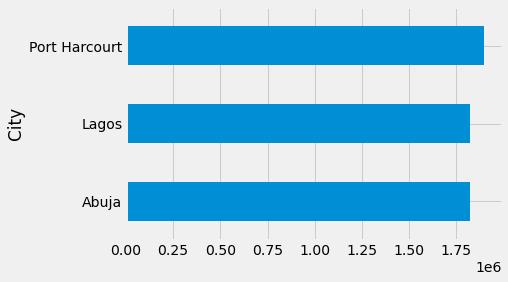

In [138]:
df.groupby('City')['gross income'].sum().plot(kind='barh')

# [Write your Answer Here]
Port Harcout has highest gross income

In [139]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 

In [140]:
df.groupby('City')["Unit price"].mean()

City
Abuja            20037.339759
Lagos            19721.107059
Port Harcourt    20379.248780
Name: Unit price, dtype: float64

In [141]:
#Syntax : sns.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, 
                           #color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

Branch
A    38232133.38
B    38231161.92
C    39804734.34
Name: Total, dtype: float64

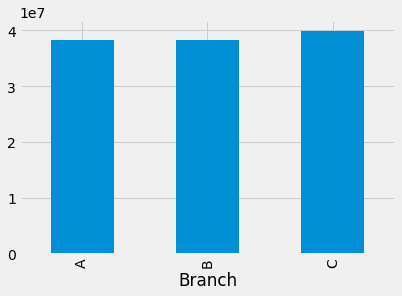

In [142]:
aas = df.groupby('Branch')['Total'].sum()
aas.plot(kind = 'bar')
aas

<AxesSubplot:xlabel='Total', ylabel='count'>

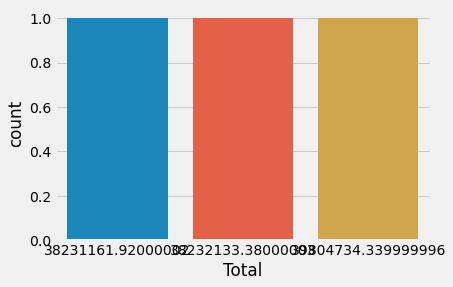

In [143]:
sns.countplot(x = aas, data = df)

A    340
B    332
C    328
Name: Branch, dtype: int64

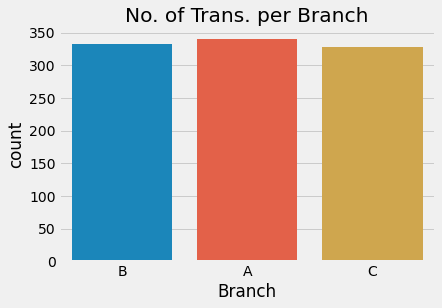

In [144]:

sns.countplot(x = 'Branch', data = df).set(title="No. of Trans. per Branch")
df['Branch'].value_counts()

#### Explore a countplot for the `Payment` and `City` Column

Payment  City         
Card     Abuja            109
         Lagos            104
         Port Harcourt     98
Cash     Port Harcourt    124
         Abuja            110
         Lagos            110
Epay     Lagos            126
         Abuja            113
         Port Harcourt    106
Name: City, dtype: int64

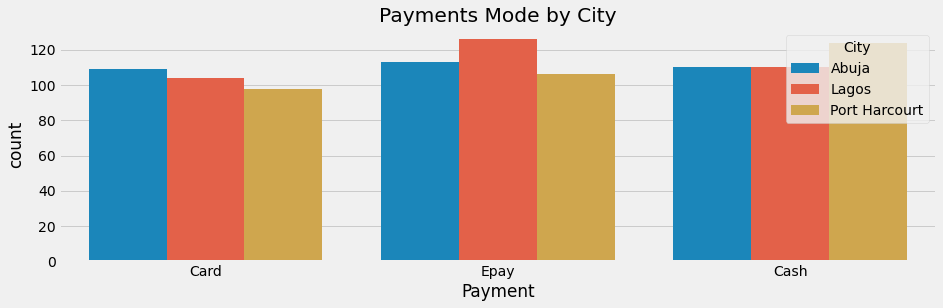

In [145]:
plt.figure(figsize=(14,4))
sns.countplot(x='Payment', hue='City', data=df).set(title="Payments Mode by City")
#sns.countplot(x='City', data=df).set(title="Monthly Avg Temperatures")
df.groupby('Payment')['City'].value_counts()

In [146]:
df.shape

(1000, 21)

Branch  Payment
A       Epay       126
        Cash       110
        Card       104
B       Epay       113
        Cash       110
        Card       109
C       Cash       124
        Epay       106
        Card        98
Name: Payment, dtype: int64

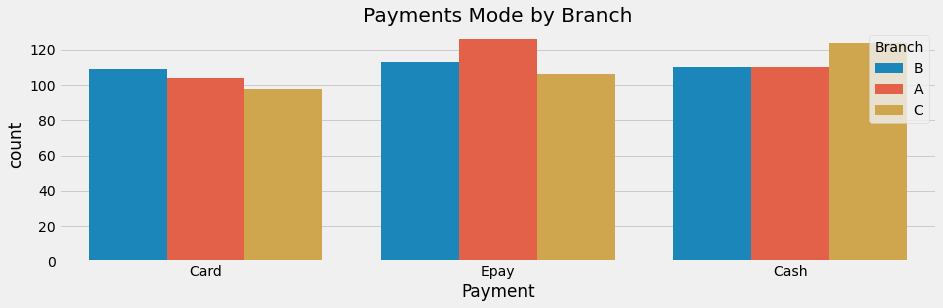

In [147]:
plt.figure(figsize=(14,4))
sns.countplot(x='Payment', hue='Branch', data=df).set(title="Payments Mode by Branch")
df.groupby('Branch')['Payment'].value_counts()

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

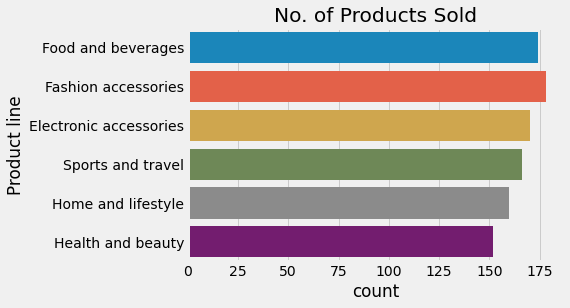

In [148]:
#[Write your Code Here]
sns.countplot(y='Product line', data=df).set(title="No. of Products Sold")
df['Product line'].value_counts()

Sports and travel products are the highest products sold while Health and beauty products are the least  

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Product line            Payment
Electronic accessories  Cash       71
                        Epay       53
                        Card       46
Fashion accessories     Epay       65
                        Cash       57
                        Card       56
Food and beverages      Card       61
                        Cash       57
                        Epay       56
Health and beauty       Epay       53
                        Card       50
                        Cash       49
Home and lifestyle      Epay       64
                        Cash       51
                        Card       45
Sports and travel       Cash       59
                        Epay       54
                        Card       53
Name: Payment, dtype: int64

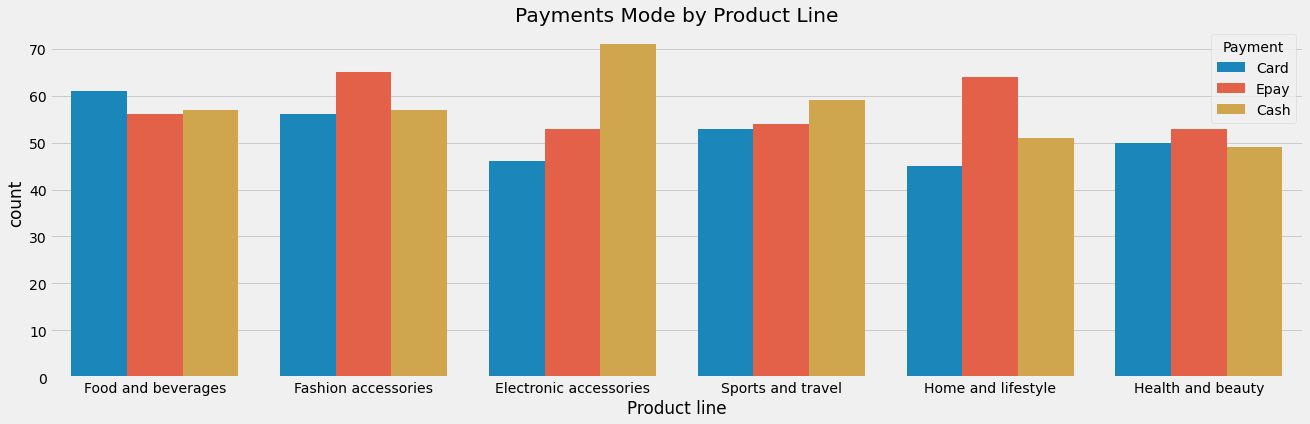

In [149]:
plt.figure(figsize=(20,6))
sns.countplot(x='Product line', data=df, hue='Payment').set(title="Payments Mode by Product Line")
df.groupby('Product line')['Payment'].value_counts()

[Text(0.5, 1.0, 'Payment Channel per Product Line')]

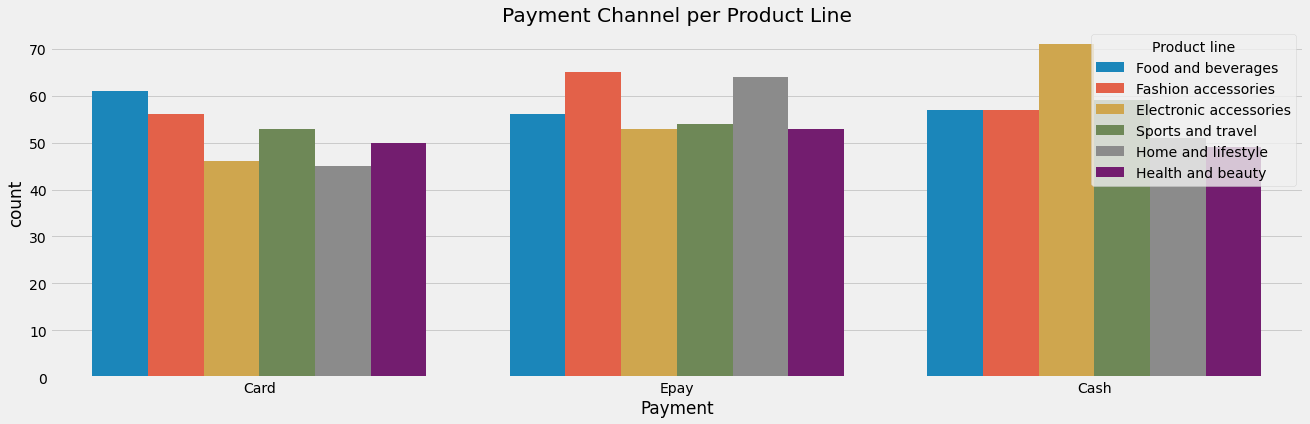

In [150]:
plt.figure(figsize=(20,6))
sns.countplot(x='Payment', data=df, hue='Product line').set(title="Payment Channel per Product Line")
#df.groupby['Payment']('').value_counts()

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

Payment  Branch
Card     B         109
         A         104
         C          98
Cash     C         124
         A         110
         B         110
Epay     A         126
         B         113
         C         106
Name: Branch, dtype: int64

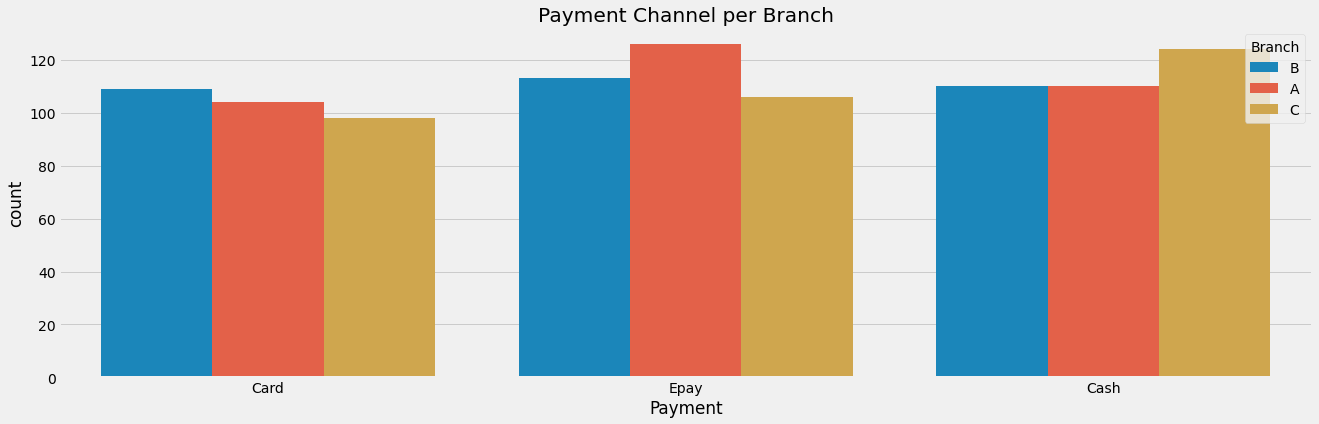

In [151]:
#[Write your Code Here]
plt.figure(figsize=(20,6))
sns.countplot(x='Payment', data=df, hue='Branch').set(title="Payment Channel per Branch")
df.groupby('Payment')['Branch'].value_counts()

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

[Text(0.5, 1.0, 'Ratings by Branch')]

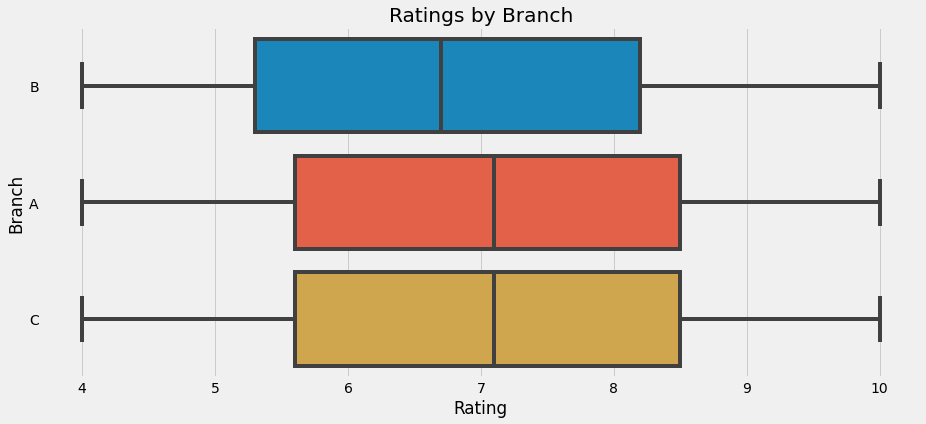

In [152]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Rating', y = 'Branch', data = df).set(title="Ratings by Branch")

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

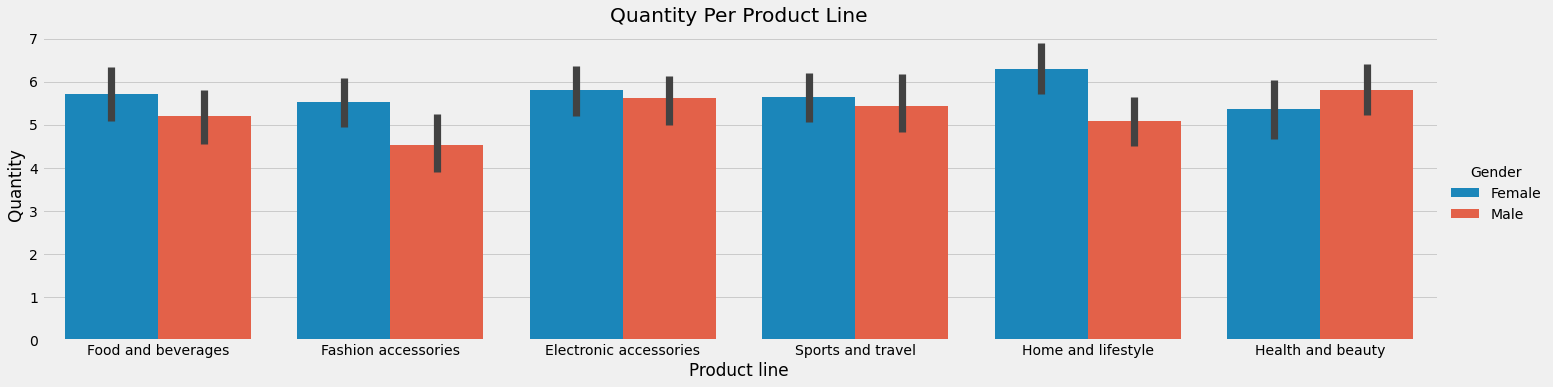

In [153]:
#[Write your Code Here]

sns.catplot(x="Product line", y="Quantity", hue="Gender", kind="bar", data=df, aspect=4).set(title="Quantity Per Product Line")
#plt.xticks(rotation=90);


- In most product lines, females bought more items than males except for Health & Beauty and Sports & Travel
- There is wide range in quantities bought by females TO males in fashion accesories and home & lifestyles than other product lines

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

- The price of sport and travel items are the highest while electronic accessories items are the least
- Home and Lifestyle products have the highest quantities sold
- Fashion accesories products are the lowest quantites sold


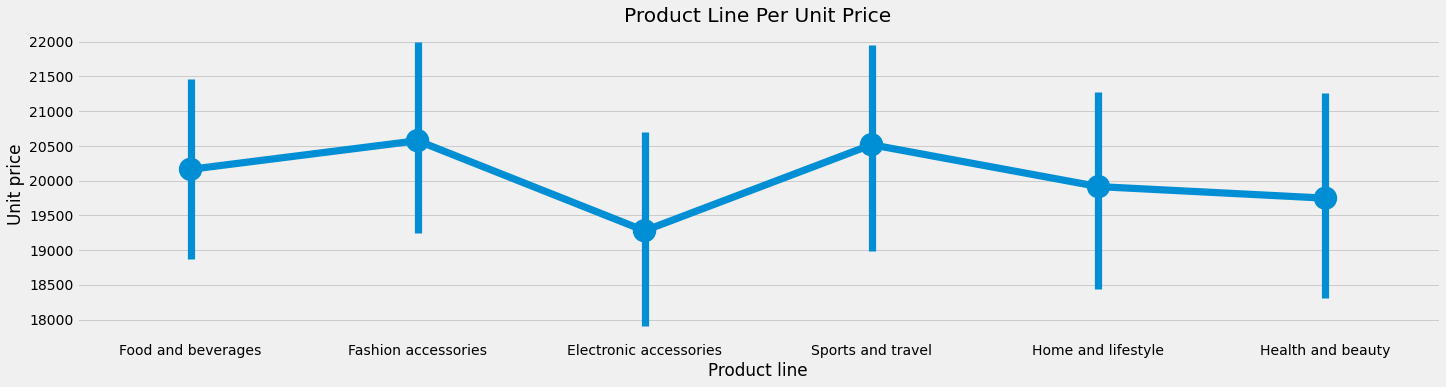

In [154]:
#[Write your Code Here]
sns.catplot(x="Product line", y="Unit price", kind="point", data=df, aspect=4).set(title="Product Line Per Unit Price");
#plt.xticks(rotation=90);

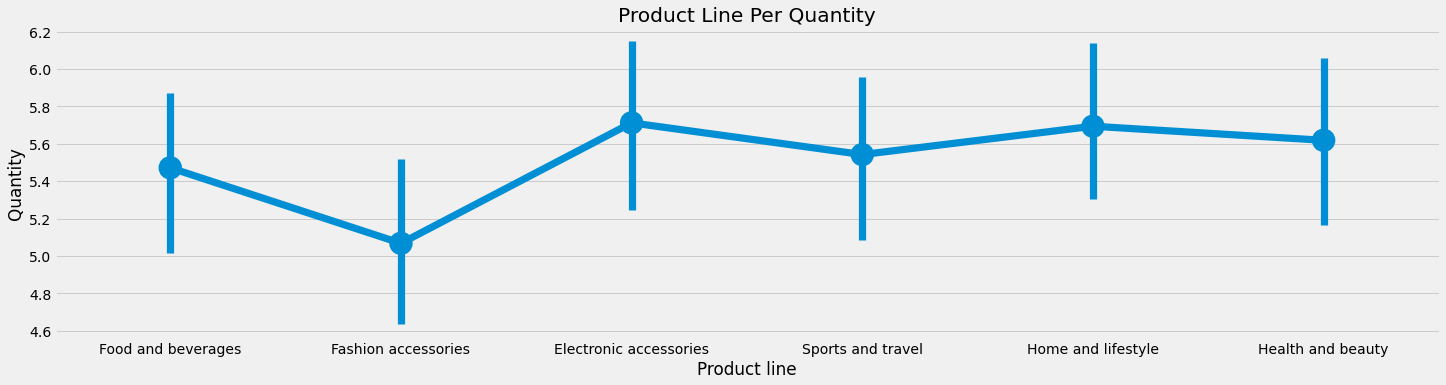

In [155]:
#[Write your Code Here]
sns.catplot(x="Product line", y="Quantity", kind="point", data=df, aspect=4).set(title="Product Line Per Quantity");

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


Customer type based on gender

Female    501
Male      499
Name: Gender, dtype: int64

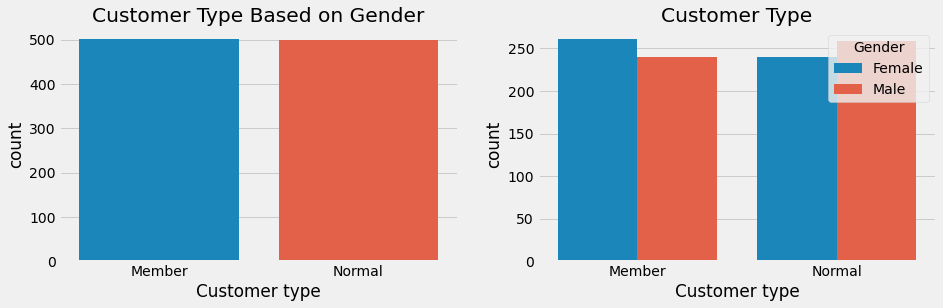

In [188]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
#sns.countplot(x='Customer type', data=df)
sns.countplot(x='Customer type', hue='Gender', data=df, ax=ax[1]).set(title="Customer Type");
sns.countplot(x='Customer type', data=df, ax=ax[0]).set(title="Customer Type Based on Gender");
df['Gender'].value_counts()

Creating a column for customer satisfaction from rating column

In [191]:
#create an empty list for rating column
rating_list = []

#populate the empty list with rating column
[rating_list.append(rate) for rate in df['Rating']] 

#create an empty list for grade
Rating_grade = []  

#populate the rating_grade list
for r in rating_list:
    if r < 5:
        a = "Not satisfy"
        Rating_grade.append(a)
    else:
        b = "Satisfy"
        Rating_grade.append(b)

Rating_grade

#adding up Rating_grade to the dataframe
df['Rating grade'] = Rating_grade



df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,hour,Rating_grade,Rating grade
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,59227.2,4.761905,2961.36,5.9,20,2,2019,13,Satisfy,Satisfy
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,20851.2,4.761905,1042.56,4.5,6,2,2019,18,Not satisfy,Not satisfy


In [193]:
df['Rating_grade'].value_counts()

Satisfy        847
Not satisfy    153
Name: Rating_grade, dtype: int64

In [202]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Year', 'hour', 'Rating_grade',
       'Rating grade'],
      dtype='object')

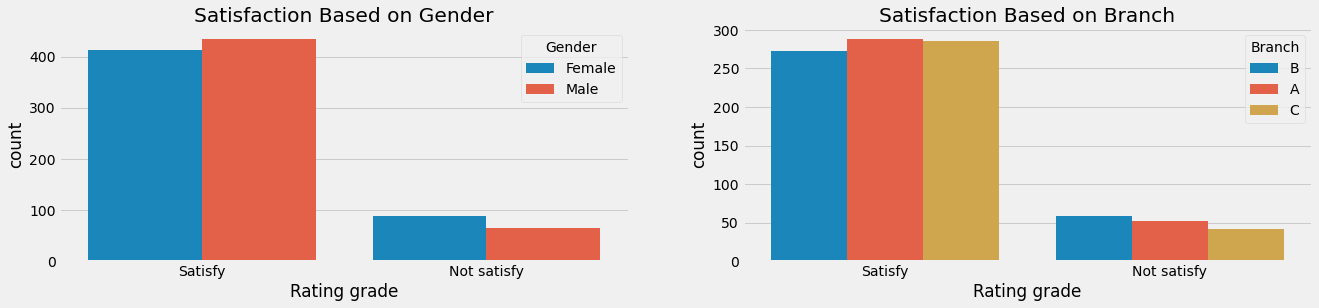

In [235]:
fig, ax = plt.subplots(1,2, figsize=(20,4))
sns.countplot(x='Rating grade', hue='Gender', data=df, ax=ax[0]).set(title="Satisfaction Based on Gender");
sns.countplot(x='Rating grade', hue='Branch', data=df, ax=ax[1]).set(title="Satisfaction Based on Branch");

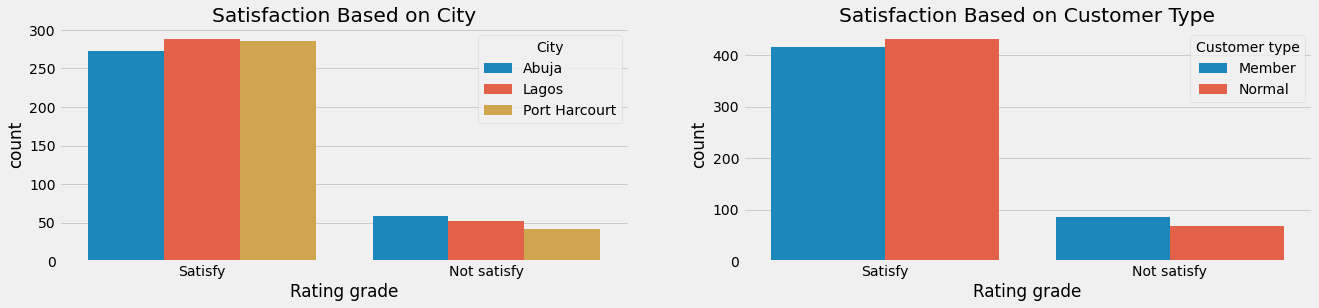

In [242]:
fig, ax = plt.subplots(1,2, figsize=(20,4))
sns.countplot(x='Rating grade', hue='City', data=df, ax=ax[0]).set(title="Satisfaction Based on City");
sns.countplot(x='Rating grade', hue='Customer type', data=df, ax=ax[1]).set(title="Satisfaction Based on Customer Type");

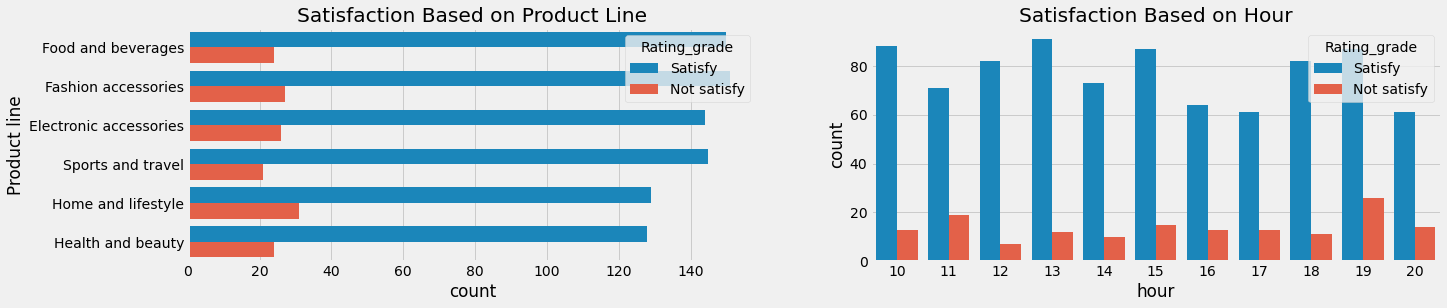

In [239]:
fig, ax = plt.subplots(1,2, figsize=(20,4))
sns.countplot(y='Product line', hue='Rating grade', data=df, ax=ax[0]).set(title="Satisfaction Based on Product Line");
sns.countplot(x='hour', hue='Rating grade', data=df, ax=ax[1]).set(title="Satisfaction Based on Hour");

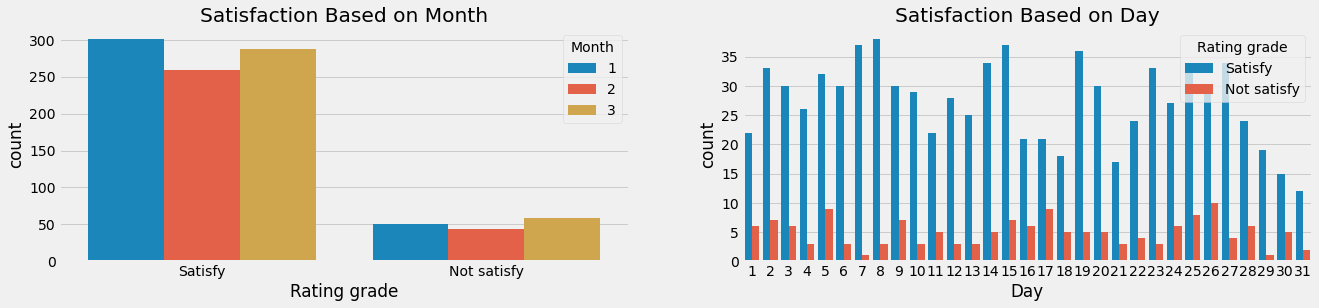

In [241]:
fig, ax = plt.subplots(1,2, figsize=(20,4))
sns.countplot(x='Rating grade', hue='Month', data=df, ax=ax[0]).set(title="Satisfaction Based on Month");
sns.countplot(x='Day', hue='Rating grade', data=df, ax=ax[1]).set(title="Satisfaction Based on Day");

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 